In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [7]:
import os
print(os.getcwd())

C:\Users\HP


In [8]:
import os
print(os.listdir())

['-1.14-windows.xml', '.anaconda', '.android', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.vscode', '3D Objects', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'd4ac4633ebd6440fa397b84f1bc94a3c.7z', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'HTML TUTORIAL', 'inittk.ini', 'inst.ini', 'Links', 'Local Settings', 'MediaGet2', 'Microsoft', 'Music', 'My Documents', 'nandini.html', 'NetHood', 'New folder', 'New folder (2)', 'Nox_share', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2598a5f2-e209-11ef-a619-e78947148fdc}.TM.blf', 'NTUSER.DAT{2598a5f2-e209-11ef-a619-e78947148fdc}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{2598a5f2-e209-11ef-a619-e78947148fdc}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'nuuid.ini', 'OneDrive', 'Pictures', 'PrintHood', 'PROJECT.ipynb', 'python.ipynb', 'Recent', 'resume.html', 'Saved Games', 'Searches', 'SendTo',

In [9]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [24]:
df.drop('Cabin', axis=1, inplace=True)

In [26]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

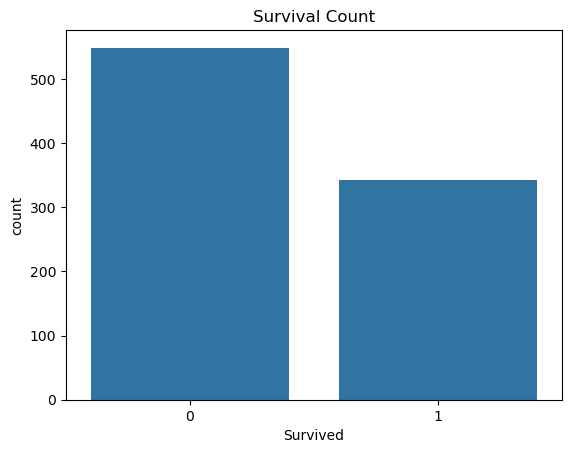

In [32]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

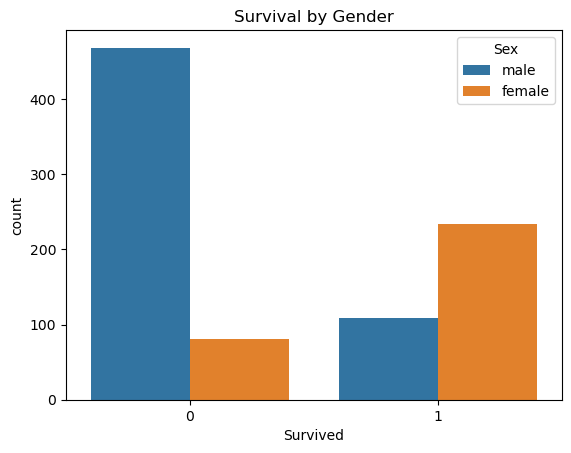

In [34]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

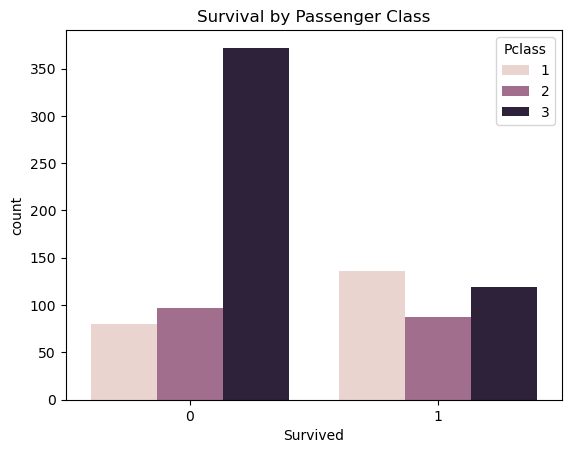

In [36]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

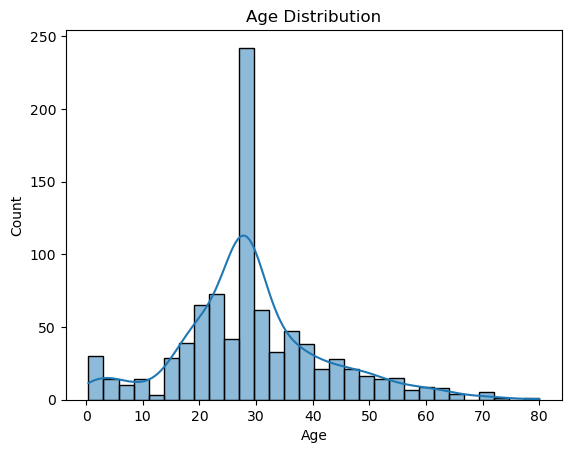

In [38]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

In [40]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [42]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [44]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [46]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [52]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [54]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [56]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [58]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked       float64
dtype: object

In [68]:
print(X.isnull().sum())  # To check for missing values in features
print(y.isnull().sum())  # To check for missing values in labels

PassengerId      0
Pclass           0
Sex            891
Age              0
SibSp            0
Parch            0
Fare             0
Embarked       891
dtype: int64
0


In [71]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex            891
Age              0
SibSp            0
Parch            0
Fare             0
Embarked       891
dtype: int64


In [73]:
print(df.head())
print(df.columns())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3  NaN  22.0      1      0   7.2500       NaN
1            2         1       1  NaN  38.0      1      0  71.2833       NaN
2            3         1       3  NaN  26.0      0      0   7.9250       NaN
3            4         1       1  NaN  35.0      1      0  53.1000       NaN
4            5         0       3  NaN  35.0      0      0   8.0500       NaN


TypeError: 'Index' object is not callable

In [75]:
# First, fix column names
df = df.rename(columns={
    '$ibSp': 'SibSp',
    'March': 'Parch',
    'Embanked': 'Embarked'
})

# Check the corrected columns
print("Corrected columns:")
print(df.columns)  # Note: No parentheses after columns

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check missing values
print("\nMissing values:")
print(df.isnull().sum())

Corrected columns:
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

First 5 rows:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3  NaN  22.0      1      0   7.2500       NaN
1            2         1       1  NaN  38.0      1      0  71.2833       NaN
2            3         1       3  NaN  26.0      0      0   7.9250       NaN
3            4         1       1  NaN  35.0      1      0  53.1000       NaN
4            5         0       3  NaN  35.0      0      0   8.0500       NaN

Missing values:
PassengerId      0
Survived         0
Pclass           0
Sex            891
Age              0
SibSp            0
Parch            0
Fare             0
Embarked       891
dtype: int64


In [77]:
# Option 1: Drop these columns if they're not recoverable
df = df.drop(['Sex', 'Embarked'], axis=1)

# Option 2: If you have another data source, you might merge to get these values
# (But based on your data, they seem completely missing)

# Handle other potential missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Verify no missing values remain
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [79]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7318435754189944

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179



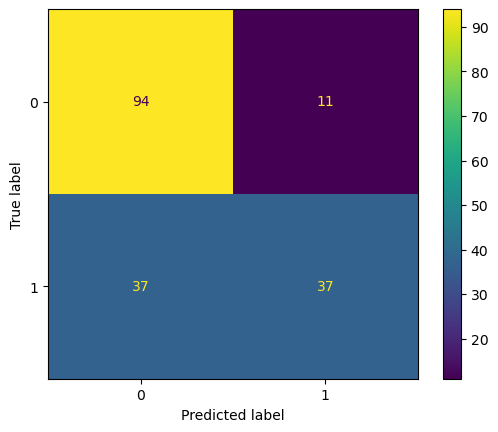

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

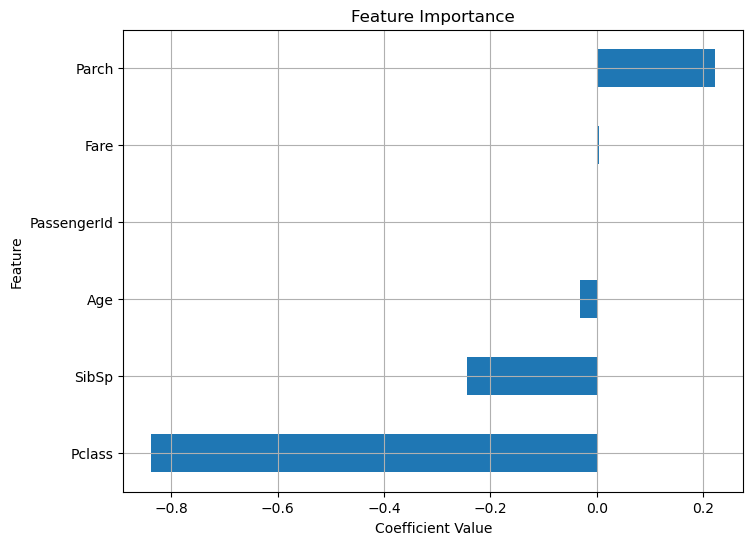

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(8, 6), title="Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

In [91]:
import joblib
joblib.dump(model, 'titanic_model.pkl')  # saves model in same folder

['titanic_model.pkl']